In [9]:
import pandas as pd
import zipfile
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the ZIP file path and extraction directory
zip_file_path = r'C:\\Users\\admin\\Downloads\\iris.zip'  # Update with your actual path
extract_dir = r'C:\\Users\\admin\\Downloads\\iris_extracted'  # Update this path if needed

# Create directory to extract ZIP file
os.makedirs(extract_dir, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the extracted files
extracted_files = os.listdir(extract_dir)
print("Extracted Files:", extracted_files)

# Load the iris.data file (change if necessary)
data_file_path = os.path.join(extract_dir, 'iris.data')
df = pd.read_csv(data_file_path, header=None)

# Assign column names (Iris dataset columns)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Display the first few rows of the dataset
print(df.head())


Extracted Files: ['bezdekIris.data', 'Index', 'iris.data', 'iris.names']
   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [11]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert the 'class' column (species) into numerical values
df['class'] = label_encoder.fit_transform(df['class'])

# Display the updated DataFrame
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width  class
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0


In [13]:
# Features (X) and Target (y)
X = df.drop('class', axis=1)  # Features: all columns except 'class'
y = df['class']  # Target: 'class' column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the split data
print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)


Training data size: (120, 4)
Testing data size: (30, 4)


In [15]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display the first few predictions
print("Predictions:", y_pred)


Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [17]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



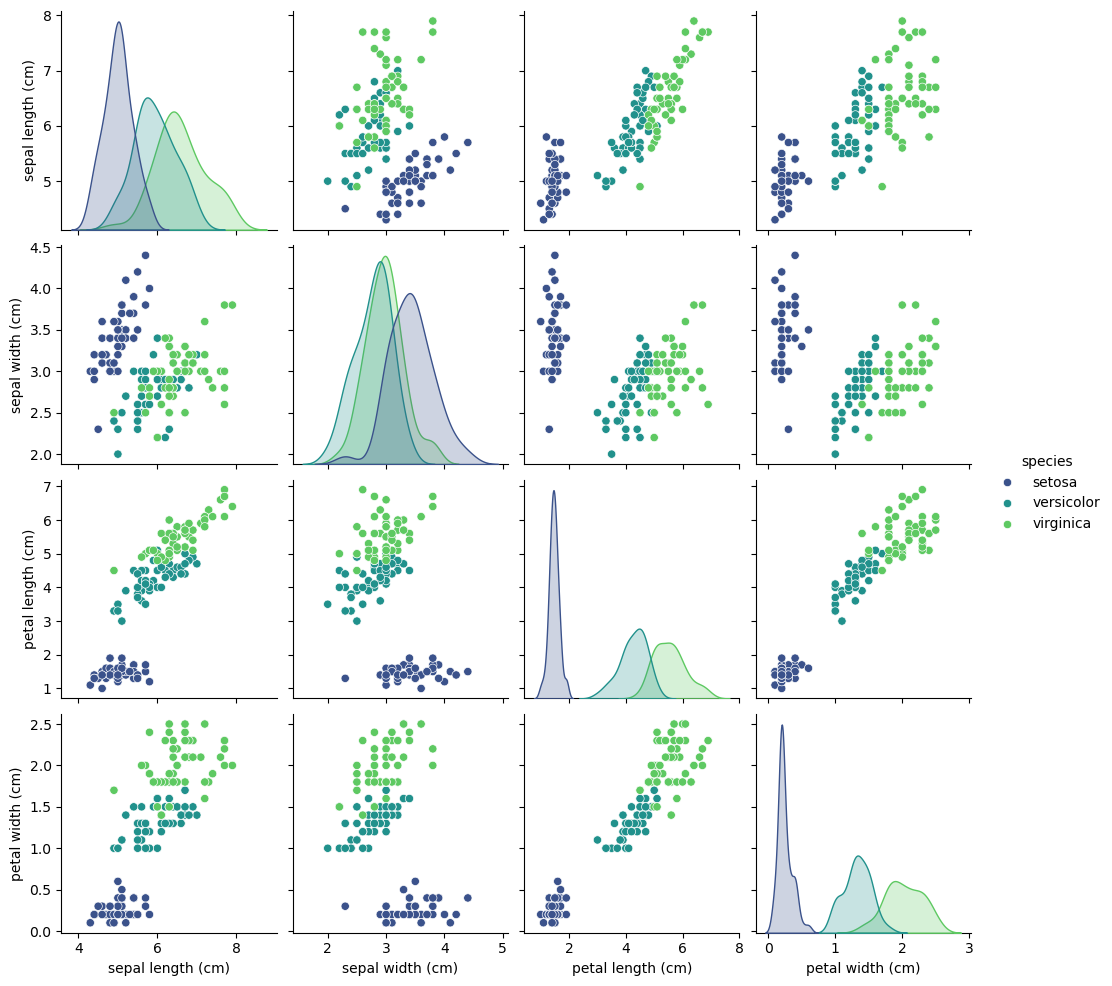

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset using scikit-learn
iris = load_iris()

# Create a pandas DataFrame from the Iris dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target (species) column to the DataFrame
df['species'] = iris.target

# Map numerical target values to species names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Create a pair plot of the Iris dataset
sns.pairplot(df, hue='species', palette='viridis')

# Display the plot
plt.show()
